<a href="https://colab.research.google.com/github/innovativenexusbd/AgroAI/blob/main/energysources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing**

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

**Load the Dataset, Prepare it and Split the Data**

In [7]:
energy_df = pd.read_csv('energy_data.csv')
X = energy_df[['Year', 'EnergySource']]
X = pd.get_dummies(X, columns=['EnergySource'], drop_first=True)  # Convert categorical variable to dummy/indicator variables
y_cost = energy_df['CostPerUnit']
y_emission = energy_df['GreenhouseEmission']
X_train, X_test, y_cost_train, y_cost_test, y_emission_train, y_emission_test = train_test_split(X, y_cost, y_emission, test_size=0.2, random_state=42)

**Initiatizing the Decision Trees Model and Train the Model**

In [8]:
cost_model = DecisionTreeRegressor(random_state=42)
emission_model = DecisionTreeRegressor(random_state=42)
cost_model.fit(X_train, y_cost_train)
emission_model.fit(X_train, y_emission_train)

DecisionTreeRegressor(random_state=42)

**Predicting the Future Values and Rank the Energy Sources**

In [9]:
future_years = np.arange(2024, 2026)
future_sources = pd.DataFrame({
    'Year': np.tile(future_years, num_sources),
    'EnergySource': np.repeat(energy_sources, len(future_years))
})
future_X = pd.get_dummies(future_sources, columns=['EnergySource'], drop_first=True)
missing_cols = set(X_train.columns) - set(future_X.columns)
for c in missing_cols:
    future_X[c] = 0
future_X = future_X[X_train.columns]
future_sources['PredictedCost'] = cost_model.predict(future_X)
future_sources['PredictedEmission'] = emission_model.predict(future_X)
future_sources['CombinedScore'] = future_sources['PredictedCost'] + future_sources['PredictedEmission']
ranked_sources = future_sources.sort_values(by='CombinedScore').reset_index(drop=True)

**Saving the Ranked Sources**

In [10]:
ranked_sources.to_csv('ranked_energy_sources.csv', index=False)
print("Ranked Energy Sources:")
print(ranked_sources)

Ranked Energy Sources:
    Year EnergySource  PredictedCost  PredictedEmission  CombinedScore
0   2024         Coal       0.220455          10.422593      10.643048
1   2025         Coal       0.220455          10.422593      10.643048
2   2024        Solar       0.145860          18.648857      18.794717
3   2025        Solar       0.145860          18.648857      18.794717
4   2024         Wind       0.267503          20.685495      20.952998
5   2025         Wind       0.267503          20.685495      20.952998
6   2024      Nuclear       0.111106          72.327843      72.438950
7   2025      Nuclear       0.111106          72.327843      72.438950
8   2024        Hydro       0.153665          93.636658      93.790323
9   2025        Hydro       0.153665          93.636658      93.790323
10  2024  Natural Gas       0.140928          95.747411      95.888339
11  2025  Natural Gas       0.140928          95.747411      95.888339


**Visualizing the Results**

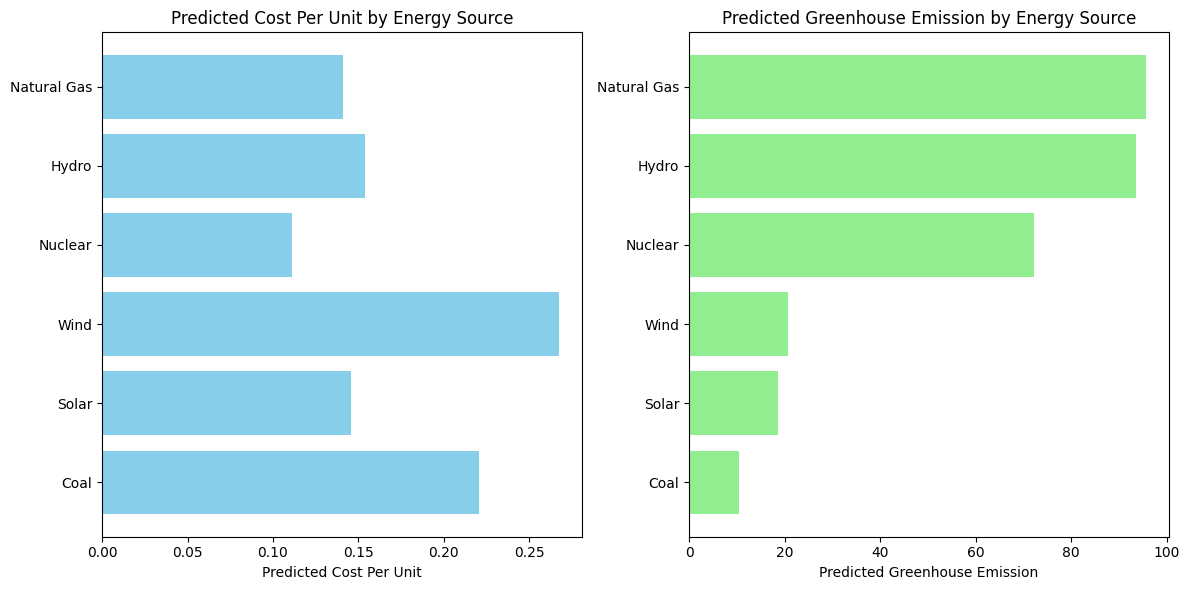

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(ranked_sources['EnergySource'], ranked_sources['PredictedCost'], color='skyblue')
plt.xlabel('Predicted Cost Per Unit')
plt.title('Predicted Cost Per Unit by Energy Source')
plt.subplot(1, 2, 2)
plt.barh(ranked_sources['EnergySource'], ranked_sources['PredictedEmission'], color='lightgreen')
plt.xlabel('Predicted Greenhouse Emission')
plt.title('Predicted Greenhouse Emission by Energy Source')
plt.tight_layout()
plt.show()
